In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
test= pd.read_csv("Test.csv")
train= pd.read_csv("Train.csv")
train.head()

Saving Test.csv to Test (2).csv
Saving Train.csv to Train (2).csv


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [2]:
test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [3]:
train = pd.get_dummies(train.drop(columns=['Employee_ID', 'Hometown']))
train.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Gender_F,Gender_M,Relationship_Status_Married,Relationship_Status_Single,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [4]:
test = pd.get_dummies(test.drop(columns=['Employee_ID', 'Hometown']))

In [5]:
import numpy as np
train.dropna() 
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.fillna(999, inplace=True)

test.dropna() 
test.replace([np.inf, -np.inf], np.nan, inplace=True)
test.fillna(999, inplace=True)

from sklearn import preprocessing
from sklearn import utils



In [6]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
                                                train.drop(columns=['Attrition_rate']),
                                                train['Attrition_rate'],
                                                test_size=1/3,
                                                random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
answers_pred = model.predict(X_train)

print(model.score(X_test, y_test))

-0.0025355854943900358


In [8]:
answers_pred = model.predict(test)
answer = pd.DataFrame({'Employee_ID': [i for i in range(len(answers_pred))],'Attrition_rate': answers_pred})
answer.to_csv('Answer.csv', index=False)
answer

,Employee_ID,Attrition_rate
0,0,0.194691
1,1,0.182173
2,2,0.181889
3,3,0.230281
4,4,0.194416
...,...,...
2995,2995,0.188666
2996,2996,0.192242
2997,2997,0.157226
2998,2998,0.156452


In [9]:
X = answer[['Employee_ID']].values
y = answer['Attrition_rate'].values

slr = LinearRegression()

slr.fit(X, y)

y_pred = slr.predict(X)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)

Slope:  [-4.16128828e-08]
Intercept: 0.18753018899855423


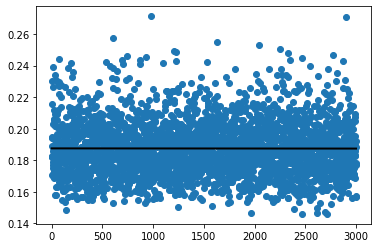

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='black', linewidth=2)

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MSE: {:.3f}'.format(mean_squared_error(y, y_pred)))

MSE: 0.000
